In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math


# Exercício 1

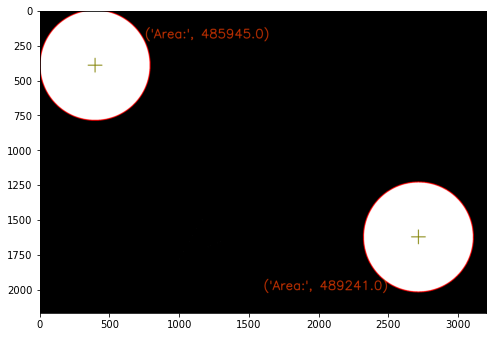

In [2]:
img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


#imagem com os dois circulos
image_lower_hsv = np.array([0, 150, 170])  
image_upper_hsv = np.array([90, 255, 230])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)


#imagem com o cisculo de cima
image_lower_hsv1 = np.array([85, 67, 89])
image_upper_hsv1 = np.array([90, 200, 255])

mask_hsv1 = cv2.inRange(img_hsv, image_lower_hsv1, image_upper_hsv1)

#imagem com o circulo de baixo
image_lower_hsv2 = np.array([0, 239, 177])
image_upper_hsv2 = np.array([0, 239, 177])

mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

#contornos recebe a imagem refinada
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy()

#cria os contornos na imgame com os dois juntos, baseado nas imagems separadas
contornos1, _ = cv2.findContours(mask_hsv1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

cv2.drawContours(contornos_img, contornos1, -1, [255, 0, 0], 5);


contornos2, _ = cv2.findContours(mask_hsv2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(contornos_img, contornos2, -1, [255, 0, 0], 5);

#fazendo os pontos
#circulo 1
cnt1 = contornos1[0]

M1 = cv2.moments(cnt1)
cx1 = int(M1['m10']/M1['m00'])
cy1 = int(M1['m01']/M1['m00'])

area1= cv2.contourArea(cnt1)
font = cv2.FONT_HERSHEY_SIMPLEX
text = "Area:",area1
origem = (1600,2000)

cv2.putText(contornos_img, str(text), origem, font,3,(200,50,0),5,cv2.LINE_AA)

#circulo 2
cnt2 = contornos2[0]

M2 = cv2.moments(cnt2)
cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

area2= cv2.contourArea(cnt2)
font = cv2.FONT_HERSHEY_SIMPLEX
text = "Area:",area2
origem = (750,200)

cv2.putText(contornos_img, str(text), origem, font,3,(200,50,0),5,cv2.LINE_AA)


## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 50
color = (128,128,0)


cv2.line(contornos_img,(cx1 - size,cy1),(cx1 + size,cy1),color,5)
cv2.line(contornos_img,(cx1,cy1 - size),(cx1, cy1 + size),color,5)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)


plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

# Exercício 2

Ângulo entre da reta: 28


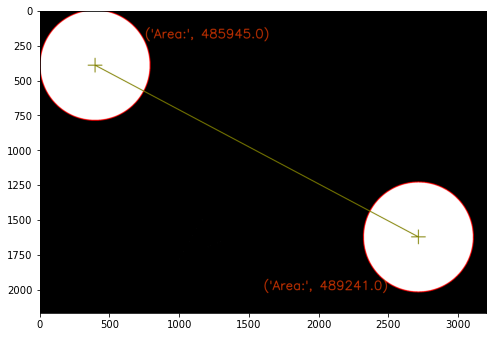

In [3]:
#linha entre os pontos
cv2.line(contornos_img,(cx1,cy1),(cx2, cy2),color,5)

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);


#angulo de inclinação
m1 = (cy1 - cy2)/(cx1 - cx2)
m2 = (cy2 - cy2)/(cx1 - cx2)
angulo = math.atan((m2-m1)/(1-(m2*m1)))
angulo_graus = round(math.degrees(angulo))
angulo_graus = angulo_graus * -1
print("Ângulo entre da reta:",angulo_graus)
